# Market Basket Analysis and Customer Clustering
--------------------------------------

## Introduction
---
In this analysis, I explored customer data from a retail company to extract valuable insights into customer behavior. Our primary objective is to support the company in making informed decisions for future campaigns, pinpointing target audiences for new products, and prioritising their most valuable customers.The dataset utilized in this analysis is a publicly available Kaggle dataset, featuring the following variables:

#### People
- **ID:** Customer's unique identifier
- **Year_Birth:** Customer's birth year
- **Education:** Customer's education level
- **Marital_Status:** Customer's marital status
- **Income:** Customer's yearly household income
- **Kidhome:** Number of children in the customer's household
- **Teenhome:** Number of teenagers in the customer's household
- **Dt_Customer:** Date of customer's enrollment with the company
- **Recency:** Number of days since the customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- **MntWines:** Amount spent on wine in the last 2 years
- **MntFruits:** Amount spent on fruits in the last 2 years
- **MntMeatProducts:** Amount spent on meat in the last 2 years
- **MntFishProducts:** Amount spent on fish in the last 2 years
- **MntSweetProducts:** Amount spent on sweets in the last 2 years
- **MntGoldProds:** Amount spent on gold in the last 2 years

#### Promotion
- **NumDealsPurchases:** Number of purchases made with a discount
- **AcceptedCmp1:** 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2:** 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:** 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:** 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:** 1 if the customer accepted the offer in the last campaign, 0 otherwise

#### Place
- **NumWebPurchases:** Number of purchases made through the company’s website
- **NumCatalogPurchases:** Number of purchases made using a catalog
- **NumStorePurchases:** Number of purchases made directly in stores
- **NumWebVisitsMonth:** Number of visits to the company’s website in the last month



## Import the Required Libraries

In [43]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

%matplotlib inline

## Data Cleaning & Feature Engineering
---

In [5]:
# Read the dataset
df_retail = pd.read_csv('/Users/azi/Documents/Projects/Market Basket Analysis and Customer Clustering/marketing_campaign.csv', sep = '\t')

In [6]:
# Renaming columns
df_retail.columns = ['customer_id','year_birth', 'education','marital_status','income', 'kid_home','teen_home','dt_customer','recency', 'mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish','mtn_sweet','mnt_gold','num_deals_purchases','num_web_purchases','num_catalog_purchases','num_store_purchases','num_web_visits_month','accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1', 'accepted_cpm2', 'conplain','z_cost_contact', 'z_revenue', 'response']

# Overview the first few rows of the data
df_retail.head()

,customer_id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,recency,mnt_wines,...,num_web_visits_month,accepted_cpm3,accepted_cpm4,accepted_cpm5,accepted_cpm1,accepted_cpm2,conplain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
# Displaying the shape of the dataset
display(df_retail.shape)

(2240, 29)

In [8]:
# Display the count of missing values (NaN) in each column of the DataFrame 'df_retail'.
display(df_retail.isnull().sum())

customer_id               0
year_birth                0
education                 0
marital_status            0
income                   24
kid_home                  0
teen_home                 0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat                  0
mnt_fish                  0
mtn_sweet                 0
mnt_gold                  0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cpm3             0
accepted_cpm4             0
accepted_cpm5             0
accepted_cpm1             0
accepted_cpm2             0
conplain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

## Remove Missing Values
---

In [9]:
# Replace missing values(NaN) with the mean value
df_imputed = df_retail.fillna(df_retail['income'].mean())

In [10]:
# Verifies that the sum of missing values across all columns is equal to zero
display(df_imputed.isnull().sum())

customer_id              0
year_birth               0
education                0
marital_status           0
income                   0
kid_home                 0
teen_home                0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
mnt_meat                 0
mnt_fish                 0
mtn_sweet                0
mnt_gold                 0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_store_purchases      0
num_web_visits_month     0
accepted_cpm3            0
accepted_cpm4            0
accepted_cpm5            0
accepted_cpm1            0
accepted_cpm2            0
conplain                 0
z_cost_contact           0
z_revenue                0
response                 0
dtype: int64

## Feature Engineering
---

In [11]:
# Create a feature with the total spent for the client
df_imputed['total_spent'] = df_imputed['mnt_wines']  + df_imputed['mnt_fruits'] + df_imputed['mnt_meat'] + df_imputed['mnt_fish'] + df_imputed['mtn_sweet'] + df_imputed['mnt_gold']

# Create a feature with the % of money spent on essential item (food-related) 
df_imputed['pct_essentials'] = (df_imputed['mnt_fruits'] + df_imputed['mnt_meat'] + df_imputed['mnt_fish'] + df_imputed['mtn_sweet'])/df_imputed['total_spent']

# Create a feature with the number of purchases for each client
df_imputed['num_purchases'] = df_imputed['num_web_purchases']+df_imputed['num_catalog_purchases'] + df_imputed['num_store_purchases']+df_imputed['num_web_visits_month']

# Create a feature with the number of children
df_imputed['num_children'] = df_imputed['kid_home'] + df_imputed['teen_home']

# Create a feature with the percentage of purchases made with a discount
df_imputed['pct_purchases_with_discount'] = df_imputed['num_deals_purchases'] / df_imputed['num_purchases']
df_imputed['pct_purchases_with_discount'].fillna(0, inplace=True)


In [12]:
# Convert the 'dt_customer' column to datetime format with the specified format
df_imputed['dt_customer'] = pd.to_datetime(df_imputed['dt_customer'], format='%d-%m-%Y')

In [13]:
# Calculate and display the last date in the 'dt_customer' column of the DataFrame.
last_date = df_imputed['dt_customer'].max()
print("Last Date in dt_customer Column:", last_date)


Last Date in dt_customer Column: 2014-06-29 00:00:00


The last recorded date is 2014-06-29. We will use 2015-01-01 as a reference date to calculate the 'days_since_enrollment' column, representing the number of days since customers enrolled with the company.

In [14]:
# Create a feature with the age of the client, and another with the number of days since they are enrolled with the company
df_imputed['dt_customer'] = pd.to_datetime(df_imputed['dt_customer'])

df_imputed['days_since_enrollment'] = ((datetime(2015,1,1) - df_imputed['dt_customer']).dt.days)

df_imputed['age'] =  2015 - df_imputed['year_birth']

In [15]:
# Group some categories that have a similar meaning 
df_imputed['relationship'] = df_imputed['marital_status'].replace({'Married':1,'Together':1,
                            'Single':0, 'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0,'YOLO':0})

df_imputed["education"] = df_imputed["education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 
                                           'Graduation':'Graduated', 'Master':'Postgraduate', 'PhD':'Postgraduate'})


## Handle Outlier Using Z-Score
---

In [16]:
# Summary Statistics of "df_imputed" dataset After Outlier Removal
summary_stats = df_imputed.describe()
print(summary_stats)

        customer_id   year_birth         income     kid_home    teen_home  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51741.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25037.797168     0.538398     0.544538   

                         dt_customer      recency    mnt_wines   mnt_fruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.

In [17]:
# Identify income outliers
z_scores_income = stats.zscore(df_imputed['income'])
threshold = 3 

income_outliers = df_imputed[abs(z_scores_income) > threshold]

In [18]:
print(income_outliers)

      customer_id  year_birth     education marital_status    income  \
164          8475        1973  Postgraduate        Married  157243.0   
617          1503        1976  Postgraduate       Together  162397.0   
655          5555        1975     Graduated       Divorced  153924.0   
687          1501        1982  Postgraduate        Married  160803.0   
1300         5336        1971  Postgraduate       Together  157733.0   
1653         4931        1977     Graduated       Together  157146.0   
2132        11181        1949  Postgraduate        Married  156924.0   
2233         9432        1977     Graduated       Together  666666.0   

      kid_home  teen_home dt_customer  recency  mnt_wines  ...  z_revenue  \
164          0          1  2014-03-01       98         20  ...         11   
617          1          1  2013-06-03       31         85  ...         11   
655          0          0  2014-02-07       81          1  ...         11   
687          0          0  2012-08-04      

In [19]:
# Remove income outliers
df_imputed = df_imputed[(z_scores_income <= threshold)]


In [20]:
# Summary Statistics of "Income" Column After Outlier Removal
summary_stats = df_imputed['income'].describe()
print(summary_stats)

count      2232.000000
mean      51640.236126
std       20601.760369
min        1730.000000
25%       35434.750000
50%       51566.000000
75%       68118.000000
max      113734.000000
Name: income, dtype: float64


In [21]:
z_scores_age = stats.zscore(df_imputed['age'])
threshold = 3 
age_outliers = df_imputed[abs(z_scores_age) > threshold]

In [22]:
print(age_outliers)

     customer_id  year_birth      education marital_status   income  kid_home  \
192         7829        1900  Undergraduate       Divorced  36640.0         1   
239        11004        1893  Undergraduate         Single  60182.0         0   
339         1150        1899   Postgraduate       Together  83532.0         0   

     teen_home dt_customer  recency  mnt_wines  ...  z_revenue  response  \
192          0  2013-09-26       99         15  ...         11         0   
239          1  2014-05-17       23          8  ...         11         0   
339          0  2013-09-26       36        755  ...         11         0   

     total_spent  pct_essentials  num_purchases  num_children  \
192           65        0.384615             10             1   
239           22        0.545455              7             1   
339         1853        0.471668             15             0   

     pct_purchases_with_discount  days_since_enrollment  age  relationship  
192                     0.100000

In [23]:
# Remove age outliers
df_imputed = df_imputed.loc[abs(z_scores_age) <= threshold]

In [24]:
# Summary Statistics of "age" Column After Outlier Removal
summary_stats = df_imputed['age'].describe()
print(summary_stats)

count    2229.000000
mean       46.111261
std        11.707430
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max        75.000000
Name: age, dtype: float64


In [25]:
print("The new dataset have {} rows.".format(df_imputed.shape[0]))

The new dataset have 2229 rows.


## Exploring the Relationships Between Columns
---

Text(0, 0.5, 'Percentual of Purchases with Discount')

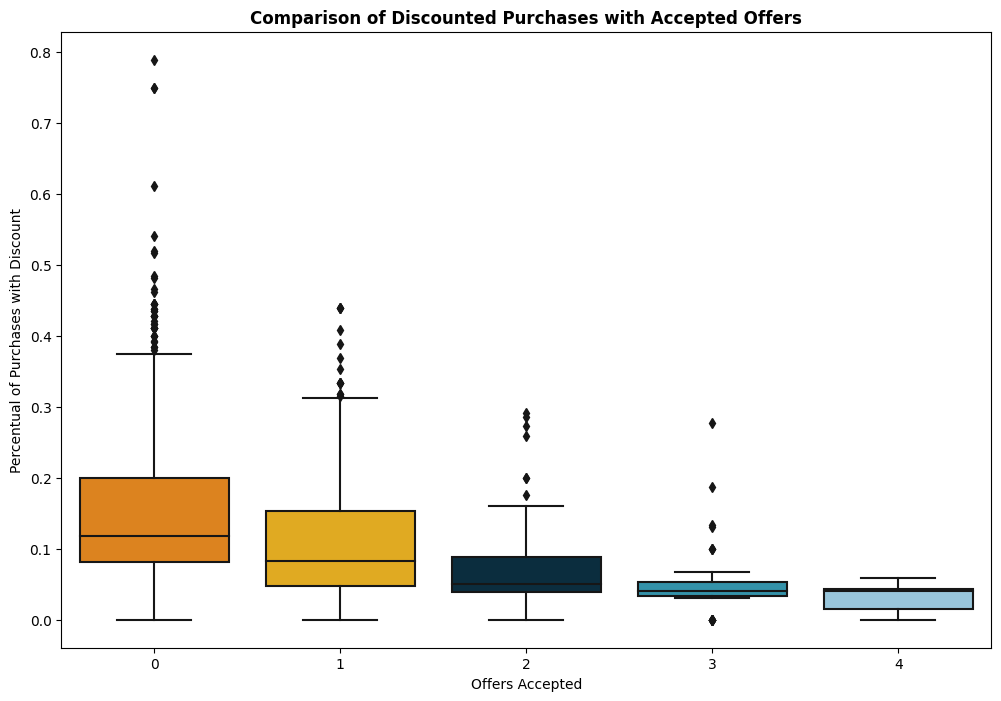

In [26]:
## Let's check the relationship between the "offers accepted", and the "percentual of purchases with discount"
df_imputed['accepted_sum'] = df_imputed['accepted_cpm3']+df_imputed['accepted_cpm4']+ df_imputed['accepted_cpm5'] + df_imputed['accepted_cpm1'] +df_imputed['accepted_cpm2']

# Define the colors
custom_palette = ["#fb8500", "#ffb703", "#023047", "#219ebc", "#8ecae6"]

# Create the box plot with custom colors
plt.figure(figsize=(12, 8))
plt.title('Comparison of Discounted Purchases with Accepted Offers', fontweight='bold')
sns.boxplot(data=df_imputed, x='accepted_sum', y='pct_purchases_with_discount', palette=custom_palette)
plt.xlabel('Offers Accepted')
plt.ylabel('Percentual of Purchases with Discount')


I won't use the "accepted~" features because they have an unexpected opposite correlation and lack clarity. The description suggests they represent whether a customer accepted an offer in a campaign, but it's unclear how they handle cases where customers didn't receive all offers or received more than five. Instead, I'll rely on "pct_purchases_with_discount" for a clearer and more straightforward insight.

## Dropping Unimportant Columns for Clustering
---

In preparation for clustering, we'll focus on retaining only the most relevant features to ensure our clusters are based on essential attributes.

In [27]:
df= df_imputed.drop(['num_web_visits_month','recency', 'conplain', 'response', 'customer_id','dt_customer',
              'year_birth','kid_home','teen_home','mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish', 
              'mtn_sweet', 'mnt_gold', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
              'z_cost_contact','z_revenue', 'accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1',
              'accepted_cpm2', 'marital_status', 'accepted_sum'], axis = 1)

In [28]:
df.head()

,education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship
0,Graduated,58138.0,3,1617,0.552876,29,0,0.103448,849,58,0
1,Graduated,46344.0,2,27,0.370370,9,2,0.222222,299,61,0
2,Graduated,71613.0,1,776,0.396907,24,0,0.041667,498,50,1
3,Graduated,26646.0,2,53,0.698113,12,1,0.166667,325,31,1
4,Postgraduate,58293.0,5,422,0.554502,19,1,0.263158,347,34,1


## Education's Impact on Financial Behavior
---

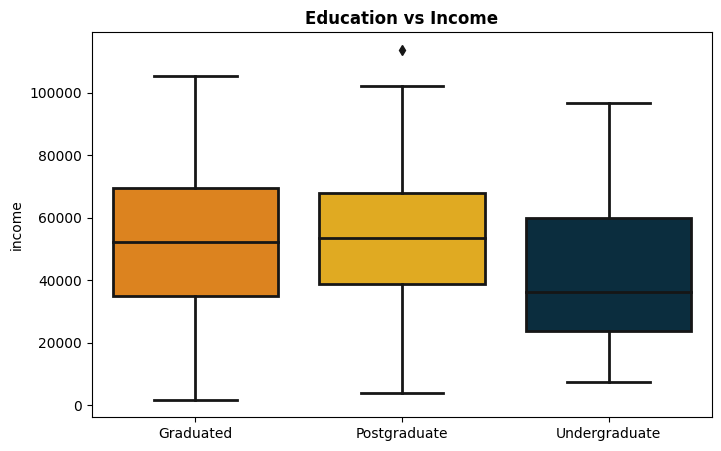

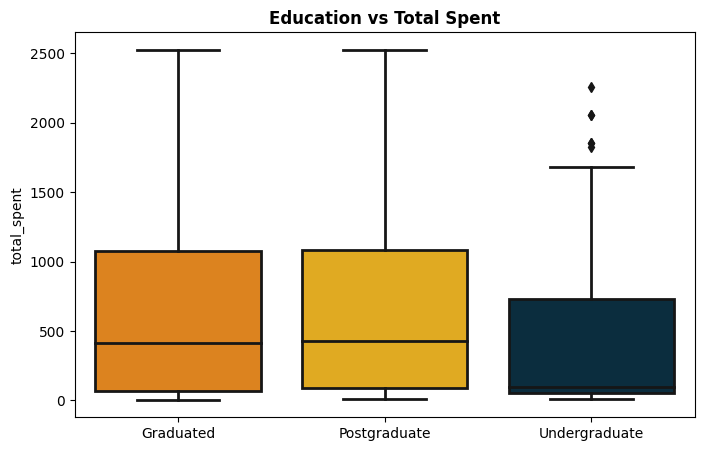

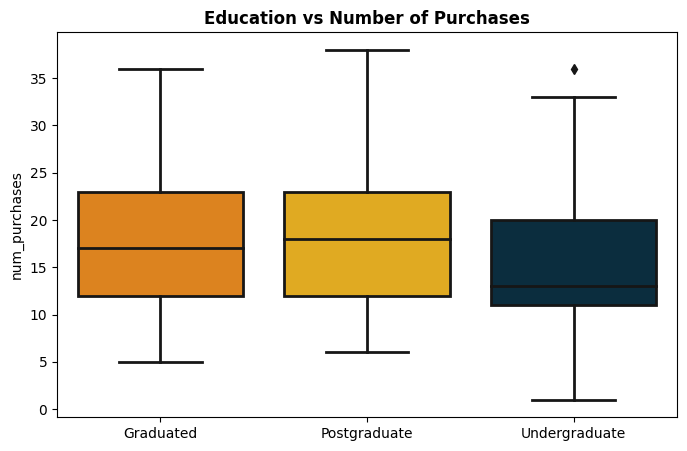

In [29]:
# Define the colors
custom_palette = ["#fb8500", "#ffb703", "#023047"]
# Purchase behavior vs Education
plt.figure(figsize=(8, 5))
plt.title("Education vs Income", fontweight='bold', fontsize=12)
sns.boxplot(y=df['income'], x=df['education'], palette=custom_palette, linewidth=2)
plt.xlabel("")
plt.show()

plt.figure(figsize=(8, 5))
plt.title("Education vs Total Spent", fontweight='bold', fontsize=12)
sns.boxplot(y=df['total_spent'], x=df['education'], palette=custom_palette, linewidth=2)
plt.xlabel("")
plt.show()

plt.figure(figsize=(8, 5))
plt.title("Education vs Number of Purchases", fontweight='bold', fontsize=12)
sns.boxplot(y=df['num_purchases'], x=df['education'], palette=custom_palette, linewidth=2)
plt.xlabel("")
plt.show()


Considering the purchasing patterns, it's reasonable to conclude that individuals with graduate and postgraduate degrees exhibit highly comparable behaviors. As a result, we will group them into a single category.

In [30]:
df["education"] = df["education"].replace({'Graduated':'Postgraduate'})
df['education'] = df['education'].replace({"Postgraduate": 1})
df['education'] = df['education'].replace({"Undergraduate": 0})
df.rename(columns={'education': 'high_education'}, inplace = True)

## Exploreatory Data Analysis (EDA)
---
Now, we'll explore our remaining variables, explore their distributions, and investigate their correlations.

In [31]:
# Summary Statistics of "df" dataset
df.describe()

,high_education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,0.885599,51628.825945,2.319874,605.541050,0.420397,17.883356,0.951996,0.136173,539.777479,46.111261,0.644235
std,0.318369,20601.302353,1.895252,601.032228,0.193082,6.512647,0.751976,0.093847,202.248700,11.707430,0.478852
min,0.000000,1730.000000,0.000000,5.000000,0.027523,1.000000,0.000000,0.000000,186.000000,19.000000,0.000000
25%,1.000000,35416.000000,1.000000,69.000000,0.263311,12.000000,0.000000,0.066667,367.000000,38.000000,0.000000
50%,1.000000,51563.000000,2.000000,397.000000,0.427685,17.000000,1.000000,0.111111,542.000000,45.000000,1.000000
75%,1.000000,68118.000000,3.000000,1044.000000,0.569767,23.000000,1.000000,0.181818,715.000000,56.000000,1.000000
max,1.000000,113734.000000,15.000000,2525.000000,0.998844,38.000000,3.000000,0.789474,885.000000,75.000000,1.000000


In [32]:
## We will generate an additional column to assist in our data visualization, but it will be removed later.
df['age_group'] = df['age']//10*10

cat_columns = ['high_education','num_children', 'relationship', 'age_group']
num_columns = ['income', 'num_deals_purchases','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'days_since_enrollment', 'pct_essentials']


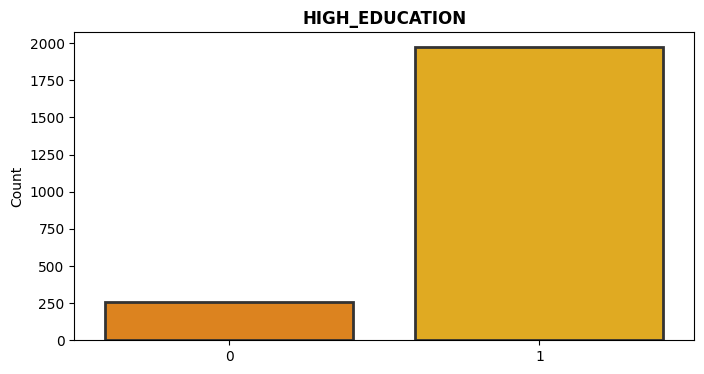

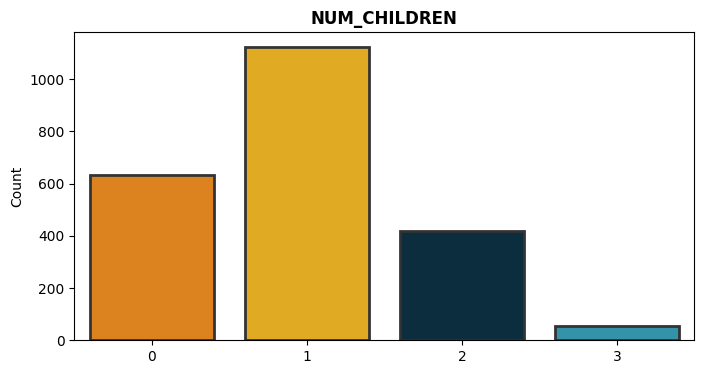

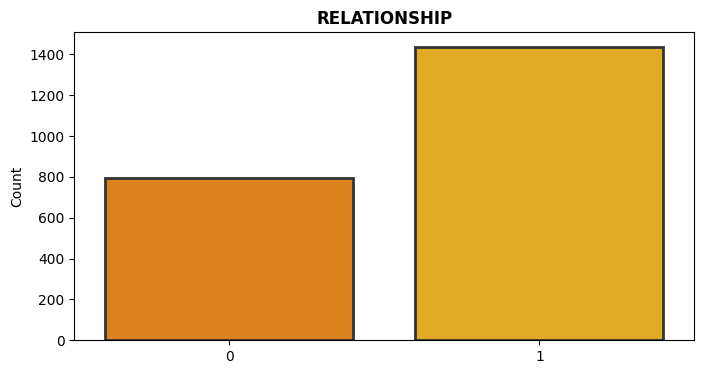

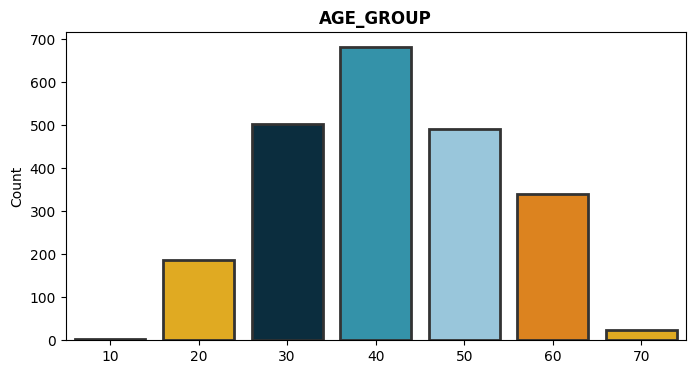

In [33]:
'''Categorical distributions (even though num_children and age_group are numerical variables,
for practical effects it makes a lot of sense to make their visualization as categorical)
'''
# Define the colors
custom_palette = ["#fb8500", "#ffb703", "#023047", "#219ebc", "#8ecae6"]
for cat in cat_columns:
    plt.figure(figsize = (8,4))
    plt.title(str.upper(cat), fontweight = 'bold')
    aux = df.groupby(cat).size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
    ax = sns.barplot(x=cat, data=aux, y = 0, palette = custom_palette,linewidth=2, edgecolor=".2").set(ylabel="Count", xlabel = None)
    
    plt.show()

As it is shown in the plots, most of our customers:
  - Are in a relationship
  - Have a high level of education (graduated or more)
  - Have one child
  - Are between 30 and 60 years old

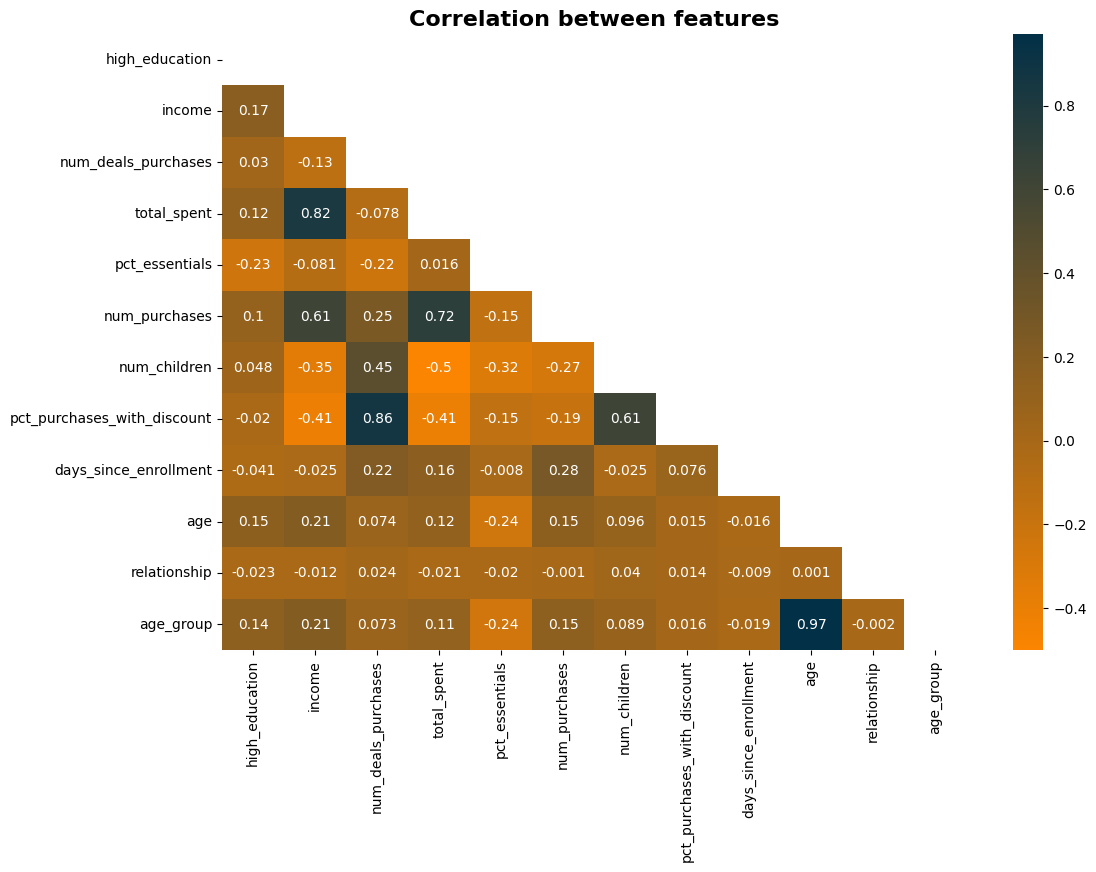

In [34]:
import numpy as np
import matplotlib.colors as mcolors

# Define your custom colormap with the specified colors
custom_colors = ['#fb8500', '#023047']
custom_cmap = mcolors.LinearSegmentedColormap.from_list("CustomColors", custom_colors)

corr = df.corr()

# Getting the Upper Triangle of the correlation matrix
matrix = np.triu(corr)

fig = plt.figure(figsize=(12, 8))
plt.title('Correlation between features', fontsize=16, fontweight='bold')
sns.heatmap(round(df.corr(), 3), annot=True, cmap=custom_cmap, mask=matrix);


Observing the correlation matrix, we notice several variables with significant correlations. Now, let's delve deeper into them.

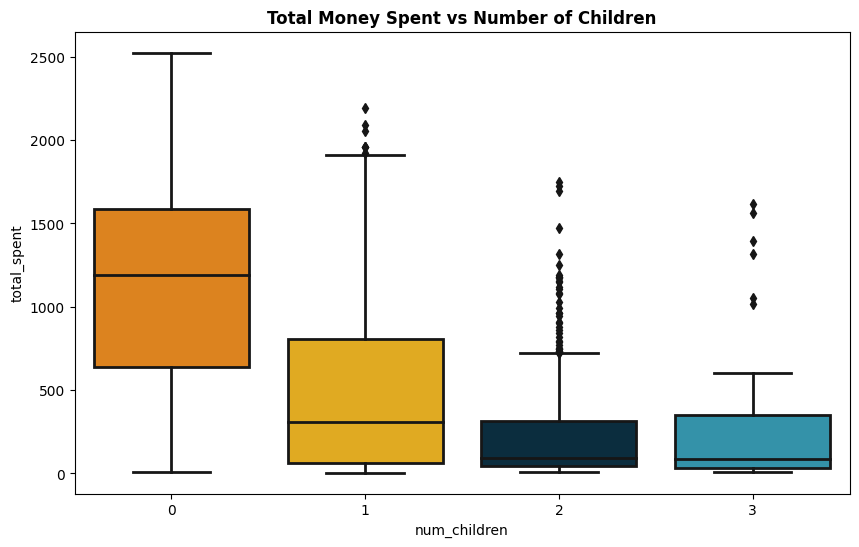

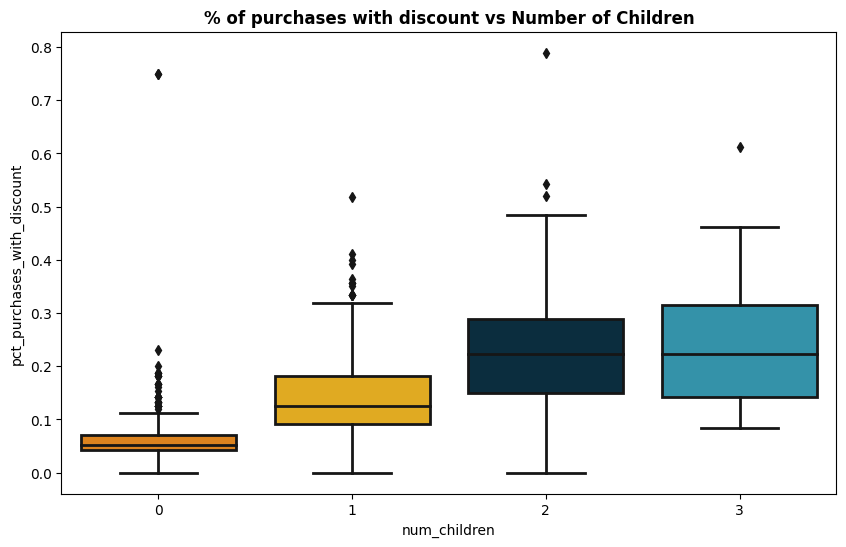

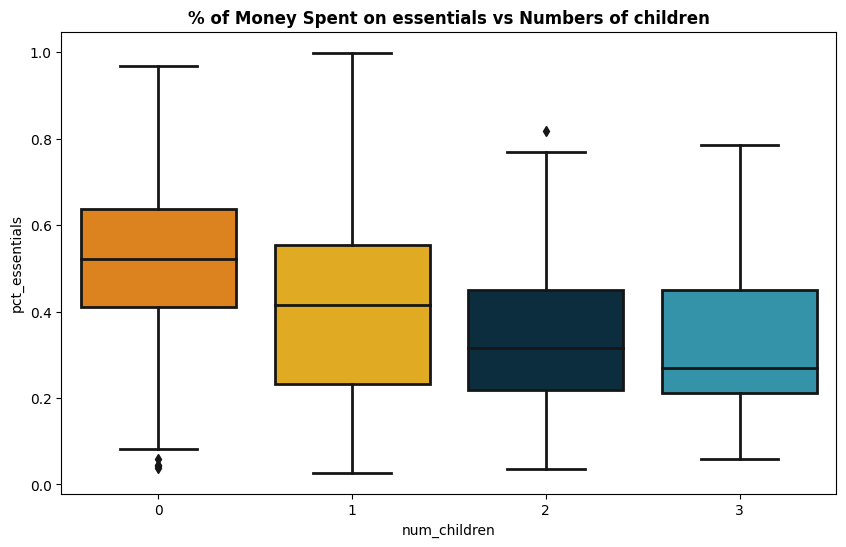

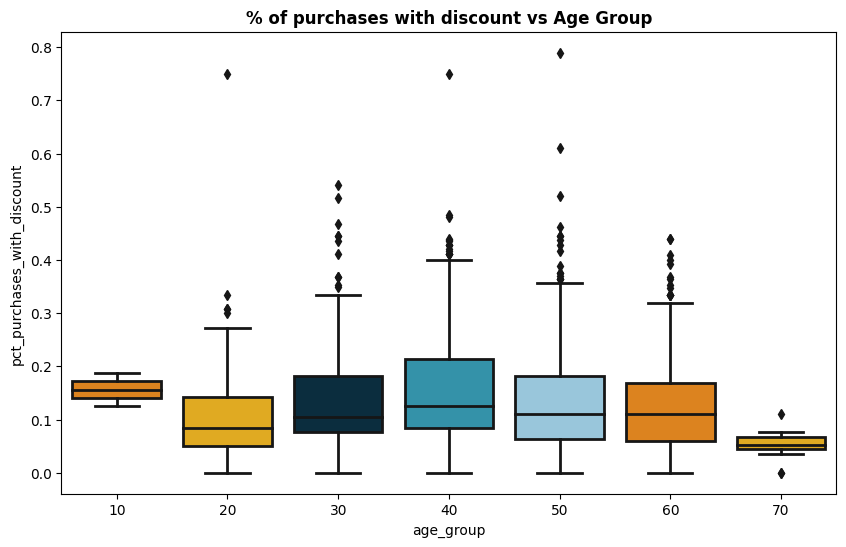

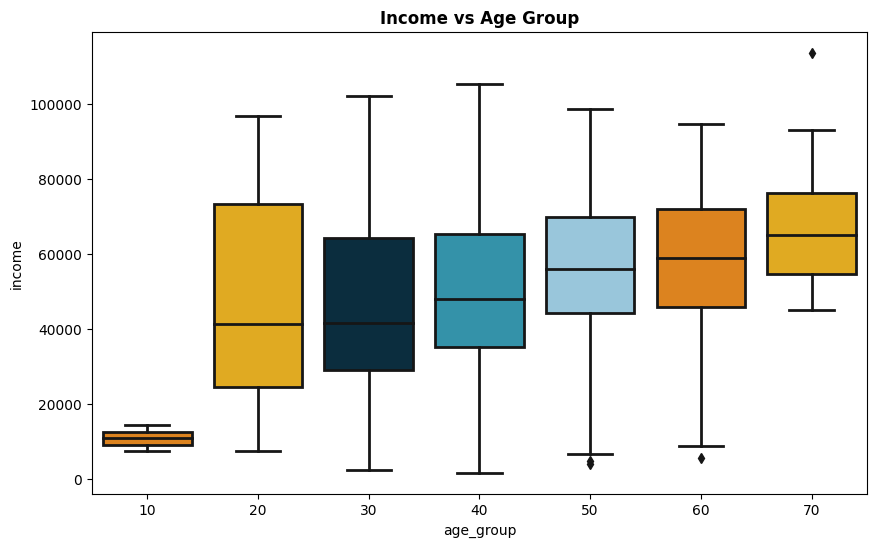

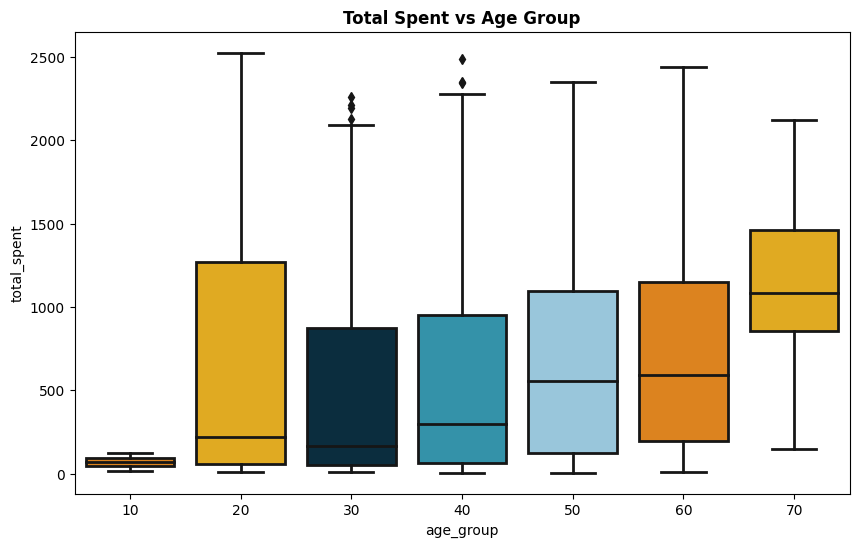

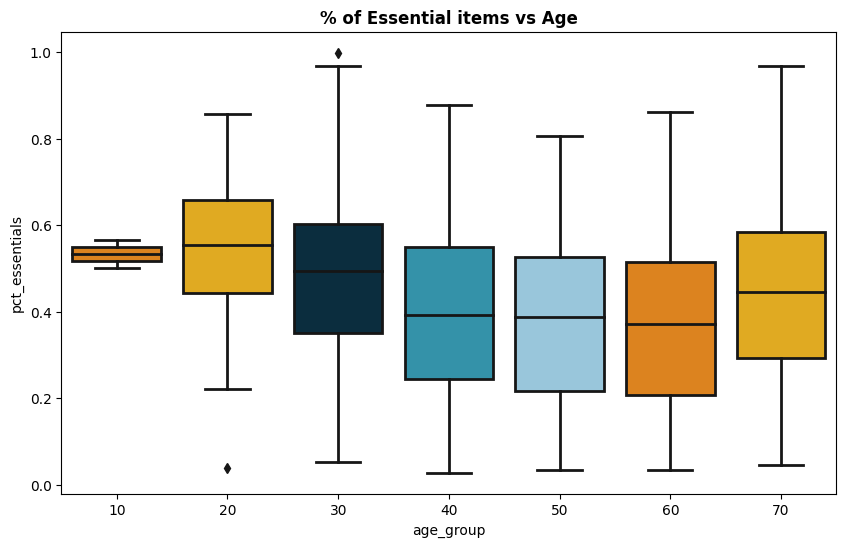

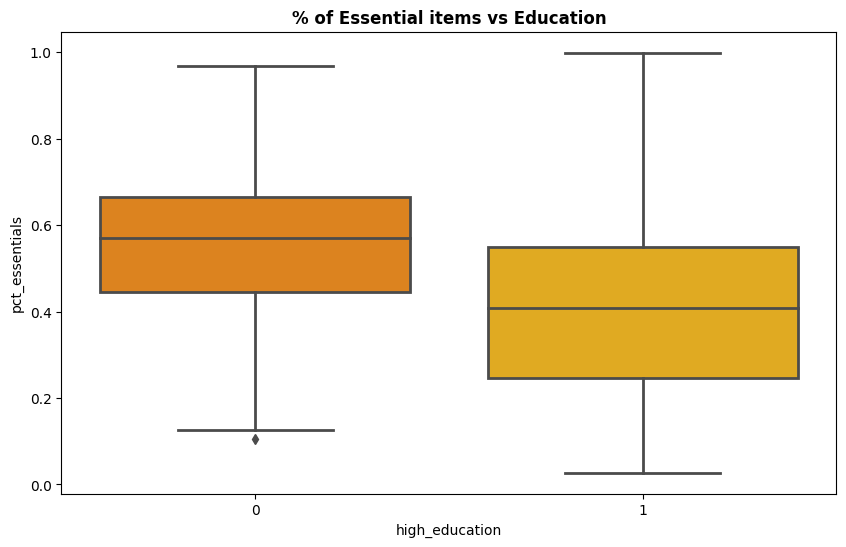

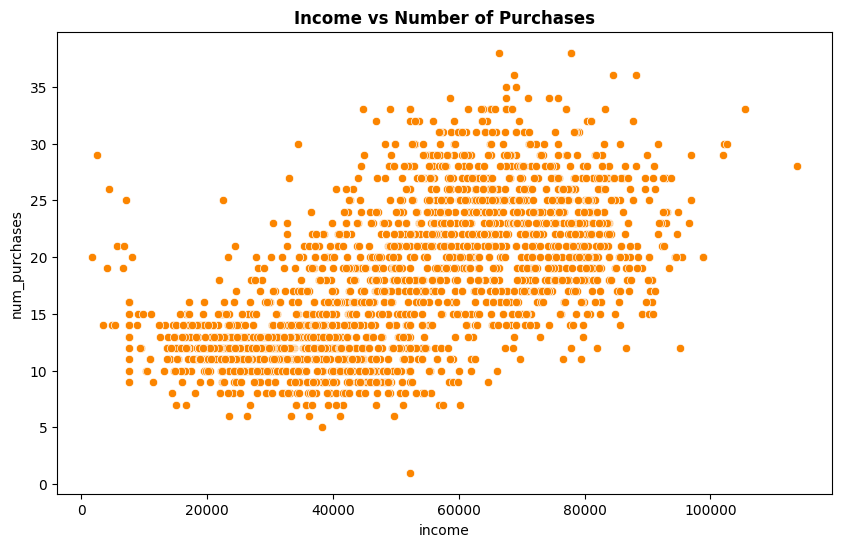

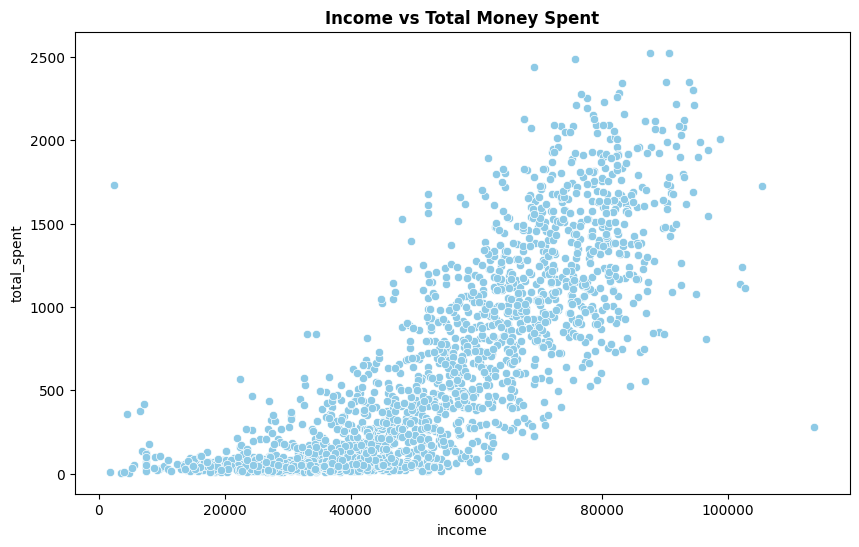

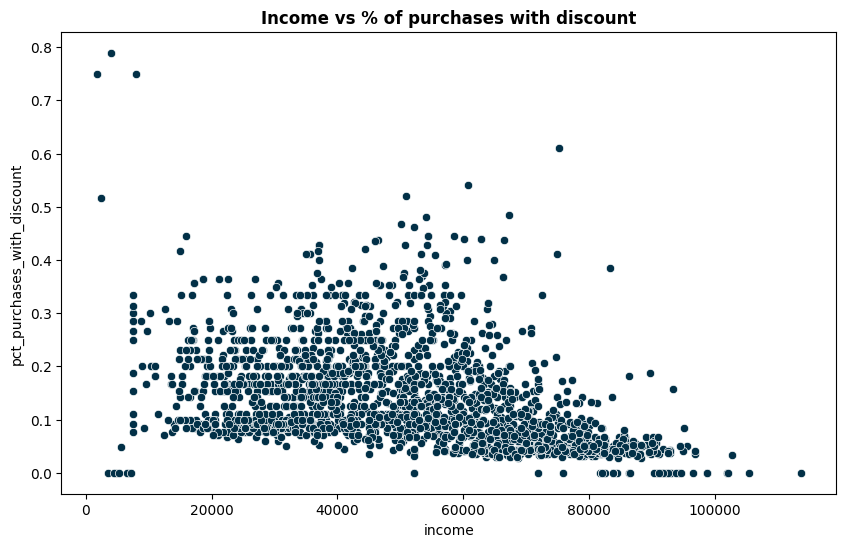

In [42]:
# Define the colors
custom_palette = ["#fb8500", "#ffb703", "#023047", "#219ebc", "#8ecae6"]
plt.figure(figsize = (10,6))
plt.title("Total Money Spent vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'num_children', palette = custom_palette, linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'num_children', palette = custom_palette, linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Money Spent on essentials vs Numbers of children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'num_children', palette = custom_palette, linewidth = 2) 
plt.show()


plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'age_group', palette = custom_palette, linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'income', x = 'age_group',palette = custom_palette, linewidth = 2)
plt.show()


plt.figure(figsize = (10,6))
plt.title("Total Spent vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'age_group', palette = custom_palette, linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Age", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'age_group', palette = custom_palette, linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Education", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'high_education', palette = custom_palette, linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Number of Purchases", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'num_purchases', color = '#fb8500')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Total Money Spent", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'total_spent', color = '#8ecae6')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs % of purchases with discount", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_purchases_with_discount', color = '#023047')
plt.show()


According to the visualizations:
    - People with less number of children are spending more money
    - People with more number of children are spending more money for products with discount.
    - Older people have higher income and spend more money
    - People with higher income spend more money, and are less inclined to wait for discounts to buy their items.

# Clustering

Now, we will employ standardization in our data preprocessing to ensure that all features in the dataset share a common scale, typically with a mean of 0 and a standard deviation of 1. This process is crucial in various machine learning and data analysis tasks, such as Principal Component Analysis (PCA) and clustering, where distance calculations or gradient-based optimization play a significant role. Standardization mitigates the impact of varying feature scales, preventing features with larger scales from dominating the analysis and allowing algorithms to focus on the underlying patterns and relationships within the data, thereby enhancing the reliability and robustness of the analytical results.

In [45]:
# Standardization
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns = df.columns)
display(df_scaled[:5].T)

,0,1,2,3,4
high_education,0.359415,0.359415,0.359415,0.359415,0.359415
income,0.316030,-0.256586,0.970262,-1.212954,0.323556
num_deals_purchases,0.358938,-0.168815,-0.696567,-0.168815,1.414444
total_spent,1.683247,-0.962795,0.283674,-0.919526,-0.305445
pct_essentials,0.686278,-0.259153,-0.121685,1.438652,0.694705
num_purchases,1.707315,-1.364322,0.939406,-0.903577,0.171496
num_children,-1.266277,1.393978,-1.266277,0.063851,0.063851
pct_purchases_with_discount,-0.348779,0.917118,-1.007250,0.325005,1.353412
days_since_enrollment,1.529265,-1.190769,-0.206611,-1.062186,-0.953384
age,1.015715,1.272020,0.332234,-1.291031,-1.034726


## Principal Component Analysis (PCA)

In our dataset, we've got many features, some of which are related and repetitive. To make our calculations faster and maintain most of the important information, we're using a method to shrink the number of features without losing too much data. This helps cut down on computation time and resources while retaining the essence of our dataset.

When applying Principal Component Analysis (PCA), we aim to find a reduced set of features (principal components) that capture most of the important information in our data. To decide how many principal components to keep while still retaining a good amount of the original data's variance (typically around 70% to 80%), we perform a variance explained analysis. This means we look at how much variance is accounted for by each principal component and select enough of them to reach our desired cumulative variance threshold. This helps us strike a balance between reducing dimensionality and preserving meaningful information in the data.

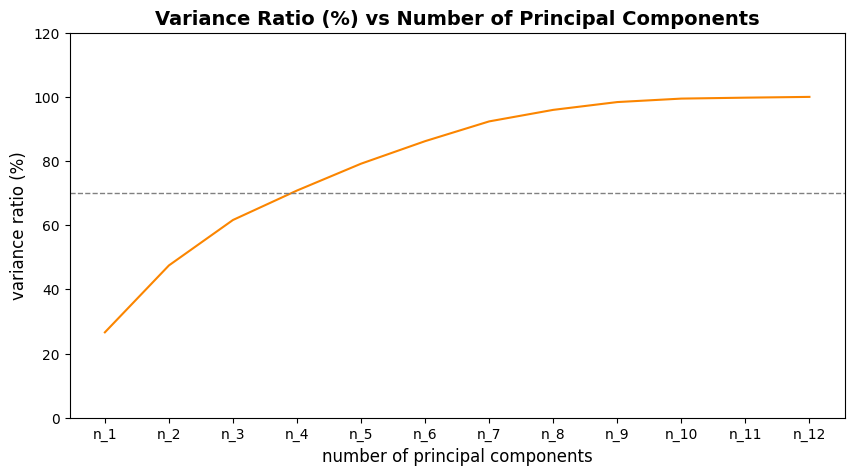

In [51]:
# Determining the number of principal components

variance_ratio = {}
for i in range(1, len(df_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()*100
    
plt.figure(figsize = (10, 5))
plt.plot(variance_ratio.keys(), variance_ratio.values(), color = '#fb8500')
plt.axhline(70, color = 'gray', ls = '--', lw = 1)
plt.title("Variance Ratio (%) vs Number of Principal Components" , fontsize = 14, fontweight = 'bold')
plt.ylabel("variance ratio (%)", fontsize = 12)
plt.xlabel("number of principal components", fontsize = 12)
plt.ylim([0, 120])
plt.show()  

Using just 4 main components, we can understand about 70% of what's happening in the data. This is pretty good because it means we're capturing most of the important stuff.

In [52]:
## Applying PCA to create a new dataset with 4 Princpal Components.

pca = PCA(n_components = 4, random_state = 123)
pca.fit(df_scaled)
df_pca = pd.DataFrame(pca.transform(df_scaled), columns = (["PC1", "PC2", "PC3", "PC4"]))
df_pca.head(10)

,PC1,PC2,PC3,PC4
0,-2.498422,1.036175,1.033631,1.294300
1,1.608981,1.448182,-2.317984,-0.144720
2,-2.126727,0.032916,-0.588499,-0.101222
3,1.728615,-1.991815,-0.127373,-0.466701
4,1.091208,-0.156057,1.456933,-0.760802
5,-1.045846,0.515888,0.153907,-0.843392
6,-0.062368,0.472401,1.394342,0.479996
7,1.076398,-1.287197,0.608779,-0.693291
8,0.747762,-1.414733,-0.718176,0.279798
9,0.987664,1.434224,-2.675768,-0.336462


We've transformed our data into a smaller set of 4 key components using PCA. Now, we're going to use the K-Means clustering technique on this new, simplified dataset to group similar data points together.

# K-Means

We're going to use the K-Means algorithm to create our clusters. But before we do that, we need to figure out how many clusters we should have. To do this, we'll try two methods: the elbow method and the silhouette score.

In the elbow method, we plot something called WCSS (the sum of squared distances from each point to its cluster's center) against the number of clusters. Initially, as we increase the number of clusters, the WCSS naturally goes down because the points are closer to their centroids. However, what we're really looking for is a point where adding more clusters doesn't significantly reduce the WCSS anymore. That's our ideal number of clusters, which we'll call 'N'.

## Determining the ideal number of clusters: Elbow method

/Users/azi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

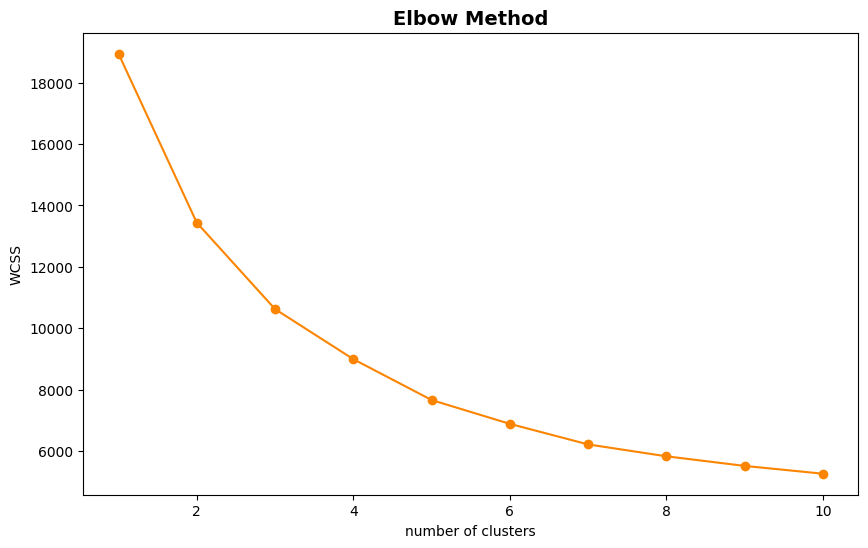

In [60]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=123)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o',color = '#fb8500')
plt.title('Elbow Method', fontsize = 14, fontweight = 'bold')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

When we examine the graph, it's not obvious what the best number of clusters should be. So, let's use silhouette scores to confirm. Silhouette scores tell us how similar data points are to others within the same cluster compared to different clusters.






/Users/azi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/azi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

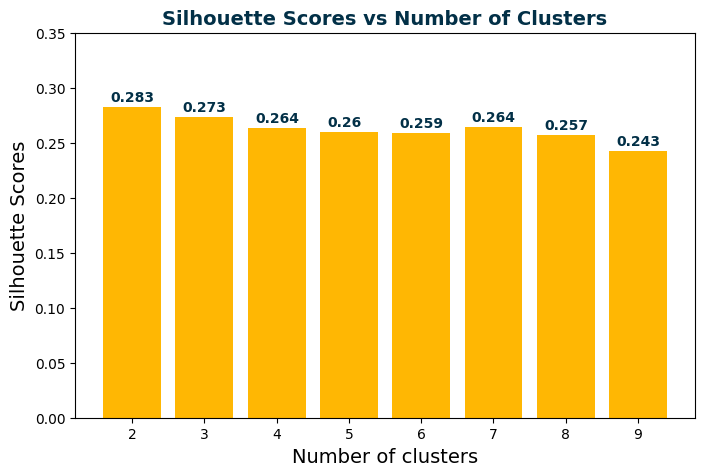

In [74]:
silhouette_scores = []

for i in range(2,10):
    m1 = KMeans(n_clusters=i, random_state=123)
    c = m1.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, m1.fit_predict(df_pca)))

plt.figure(figsize = (8,5))
plt.bar(range(2,10), silhouette_scores, color = '#ffb703')
plt.title("Silhouette Scores vs Number of Clusters", fontsize = 14,color = '#023047', fontweight = 'bold')
plt.xlabel('Number of clusters', fontsize = 14) 
plt.ylabel('Silhouette Scores', fontsize = 14)
plt.ylim(0,0.35)
for a, b in enumerate(silhouette_scores):
    plt.text(a + 1.7, b + 0.005, str(round(b,3)), color='#023047', fontweight='bold')
plt.show()

A higher silhouette score indicates that the data points are well clustered and that each point is closer to the other members of its cluster compared to points in other clusters.
So, We've made a decision: We'll use K-Means with 2 clusters, and then we'll combine the outcomes with the original dataset.

In [57]:
kmeans = KMeans(n_clusters=2, random_state=123).fit(df_pca)
pred = kmeans.predict(df_pca)
df['cluster'] = pred + 1
df.head()

/Users/azi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,high_education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship,age_group,cluster
0,1,58138.0,3,1617,0.552876,29,0,0.103448,849,58,0,50,1
1,1,46344.0,2,27,0.370370,9,2,0.222222,299,61,0,60,2
2,1,71613.0,1,776,0.396907,24,0,0.041667,498,50,1,50,1
3,1,26646.0,2,53,0.698113,12,1,0.166667,325,31,1,30,2
4,1,58293.0,5,422,0.554502,19,1,0.263158,347,34,1,30,2


## Analyzing the clusters

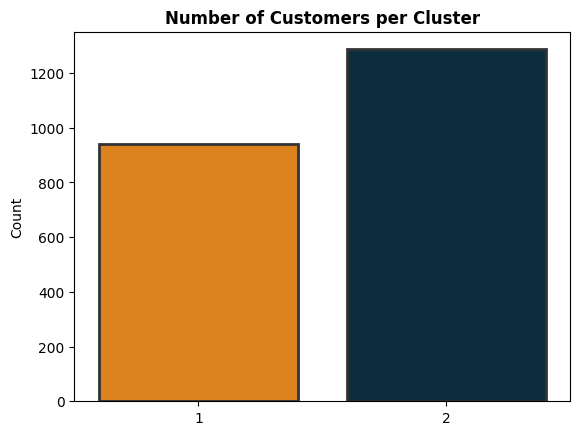

In [67]:
custom_palette = ["#fb8500", "#023047"]

aux = df.cluster.value_counts()/len(df.count())
plt.title('Number of Customers per Cluster', fontweight = 'bold')
aux = df.groupby('cluster').size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
ax = sns.barplot(x='cluster', data=aux, y = 0, linewidth=2, edgecolor=".2",  palette = custom_palette).set(ylabel="Count", xlabel = None)


In [75]:
# Creating an auxiliar dataset to help the evaluation
clusters_evaluation = df.groupby('cluster').mean().T
clusters_evaluation['mean_dataset'] = df.mean().T
clusters_evaluation

cluster,1,2,mean_dataset
high_education,0.928875,0.853924,0.885599
income,70229.492047,38014.352389,51628.825945
num_deals_purchases,1.807856,2.694639,2.319874
total_spent,1182.088110,183.546232,605.541050
pct_essentials,0.428046,0.414799,0.420397
num_purchases,23.143312,14.033411,17.883356
num_children,0.481953,1.296037,0.951996
pct_purchases_with_discount,0.076944,0.179524,0.136173
days_since_enrollment,560.521231,524.594406,539.777479
age,48.739915,44.187257,46.111261


In [76]:
plt.figure(figsize = (8,8))
clusters_evaluation.drop('mean_dataset', axis = 1).style.background_gradient(cmap='RdYlGn',axis=1)

cluster,1,2
high_education,0.928875,0.853924
income,70229.492047,38014.352389
num_deals_purchases,1.807856,2.694639
total_spent,1182.088110,183.546232
pct_essentials,0.428046,0.414799
num_purchases,23.143312,14.033411
num_children,0.481953,1.296037
pct_purchases_with_discount,0.076944,0.179524
days_since_enrollment,560.521231,524.594406
age,48.739915,44.187257


<Figure size 800x800 with 0 Axes>

From the table above, we can have a good idea of the differences between the clusters. At first glance, we can see that the income is very important to divide the users: In the cluster 1, we have a lot of customers with medium income, the cluster 2 we have people with lower-income, and the 3, with a higher income.

Let's make some more visualizations, to get some more insights.

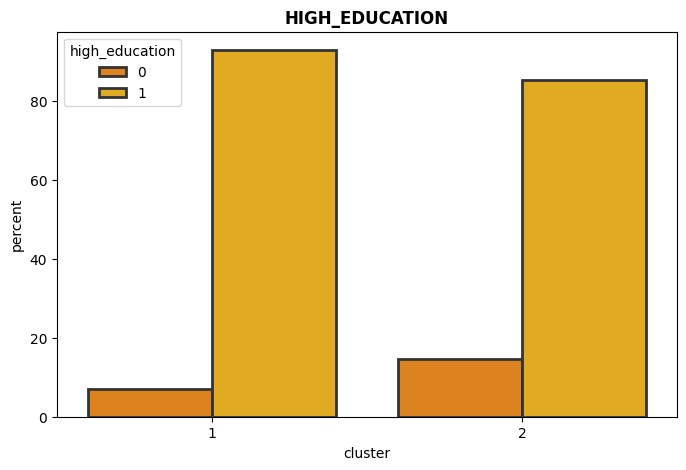

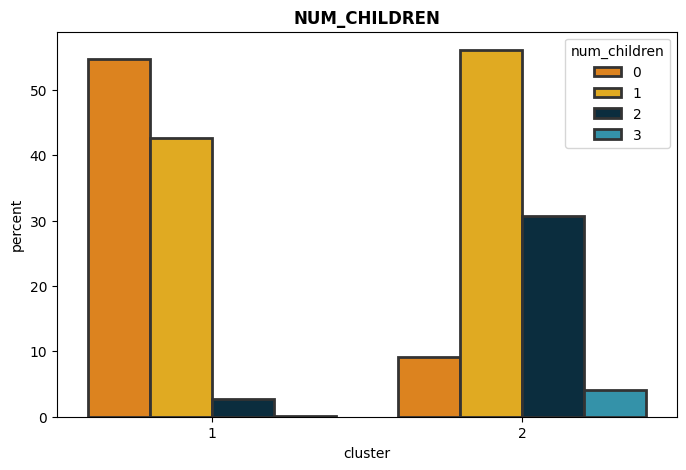

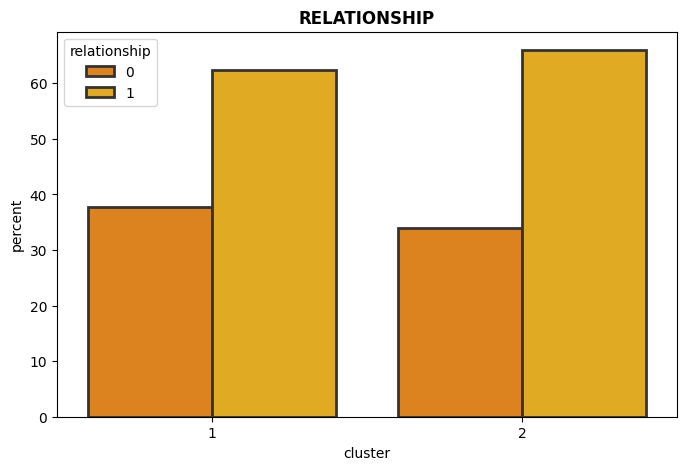

In [79]:
# Categorical Visualizations
custom_palette = ["#fb8500", "#ffb703", "#023047", "#219ebc"]

cat_columns = ['high_education','num_children', 'relationship']
num_columns = ['income','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'age', 'pct_essentials']

for cat in cat_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(cat), fontweight = 'bold')
    df_aux = df.groupby('cluster')[cat].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    sns.barplot(data = df_aux, x='cluster',y='percent',hue=cat, palette = custom_palette ,linewidth=2, edgecolor=".2");
    plt.show()    

Insights:
- Most of the customers of high education falls into cluster 2
- Pretty much everyone of the cluster 1 does not have child and cluster 2 have at least 1 children.
- Most of customers in cluster 1 and cluster 2 have 1 child.

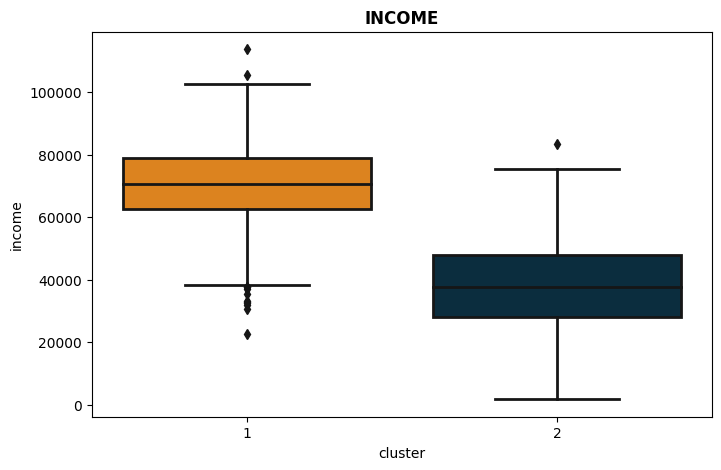

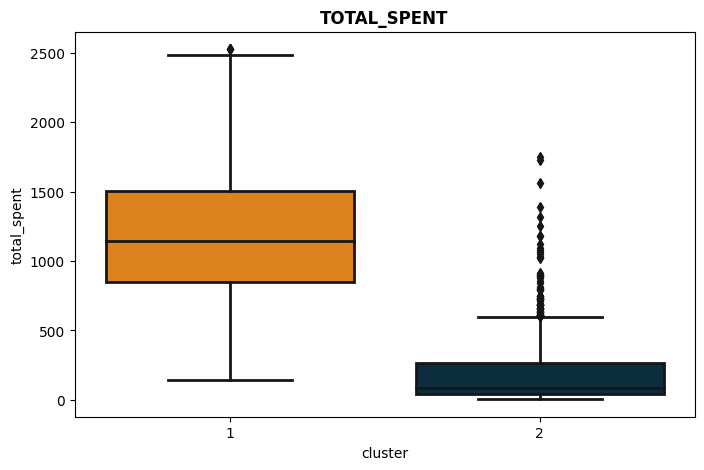

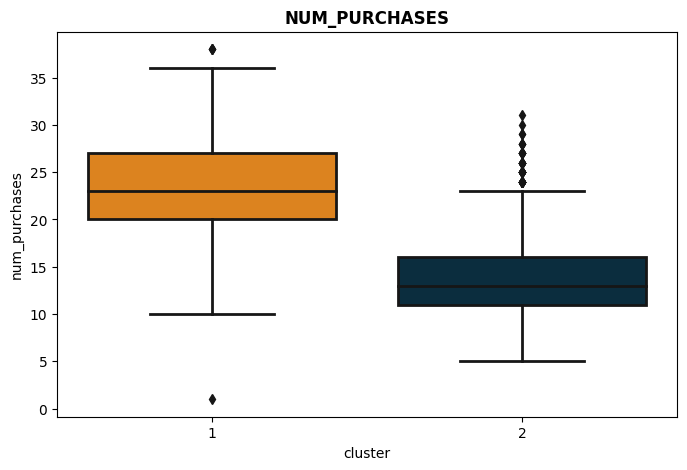

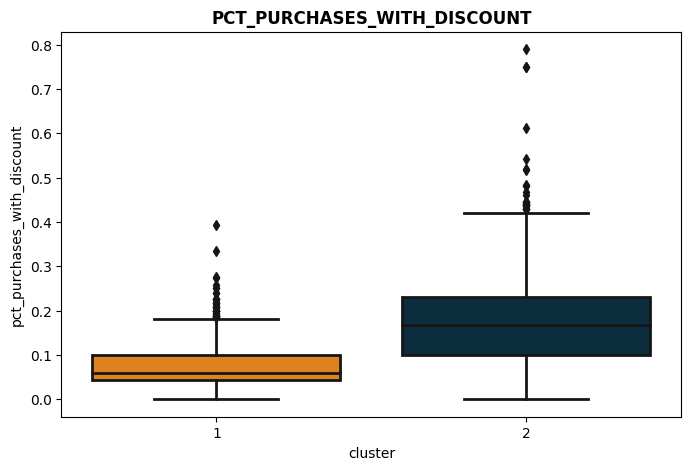

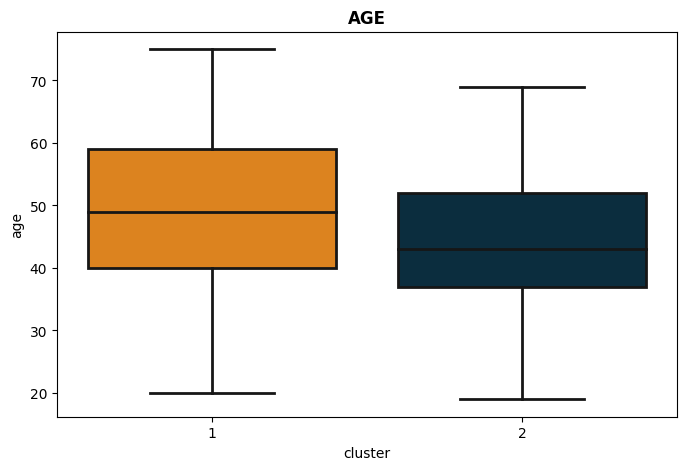

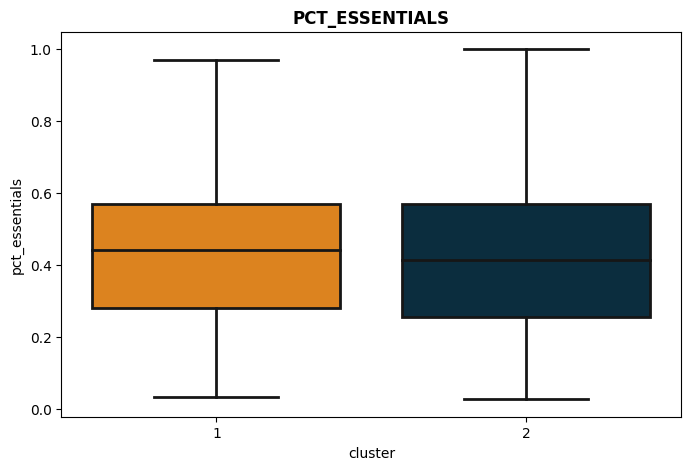

In [83]:
# Numerical Variables
custom_palette = ["#fb8500", "#023047"]
for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = custom_palette, linewidth = 2)#.set(ylabel="Count", xlabel = None)
    plt.show()

### Insights:

#### Income: 
Cluster 1 has high income 
Cluster 2 has low income

#### Total Spent:
Cluster 1 spent more money
Cluster 2 spent less money

#### Number of purchases:
Cluster 1 has more number of purchases
Cluster 2 has less number of purchases

#### Number of purchases with discount:
Cluster 1 buy a lot of items without discount
Cluster 2 buys a lot of items with discount

#### Percentage of purchase for essential items:
both cluster almost have the same behaviour in purchasing for essential items

#### Age:
Customers in cluster 1 are older than customers in cluster 2


## More insights 

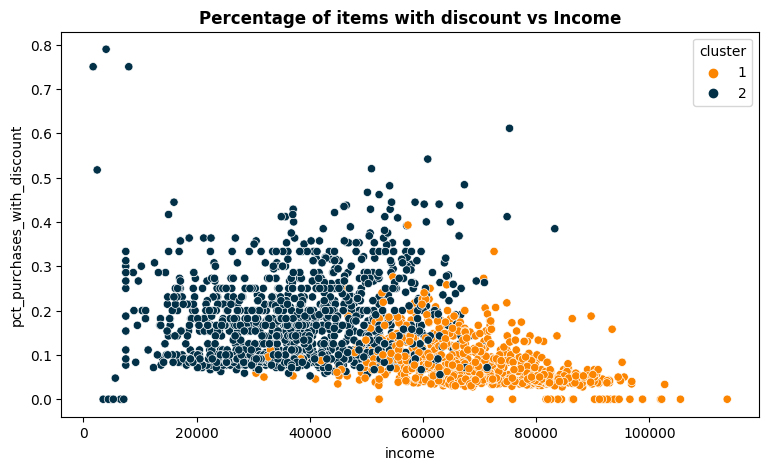

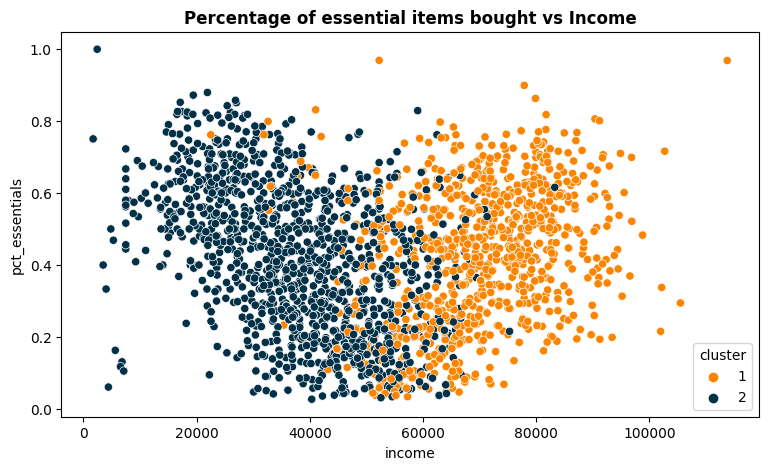

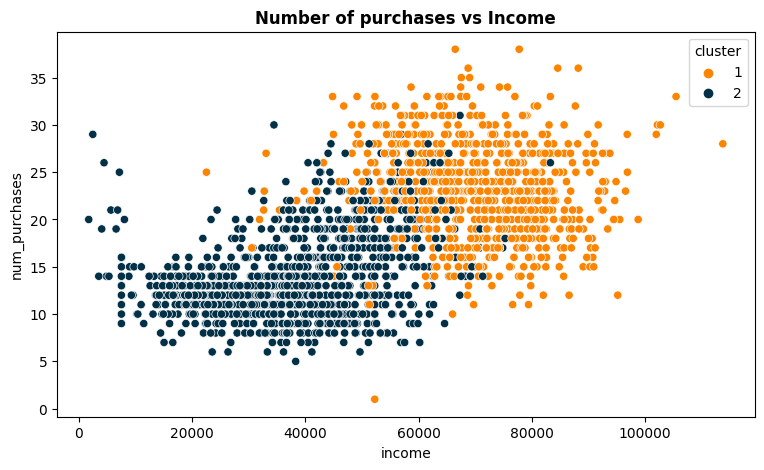

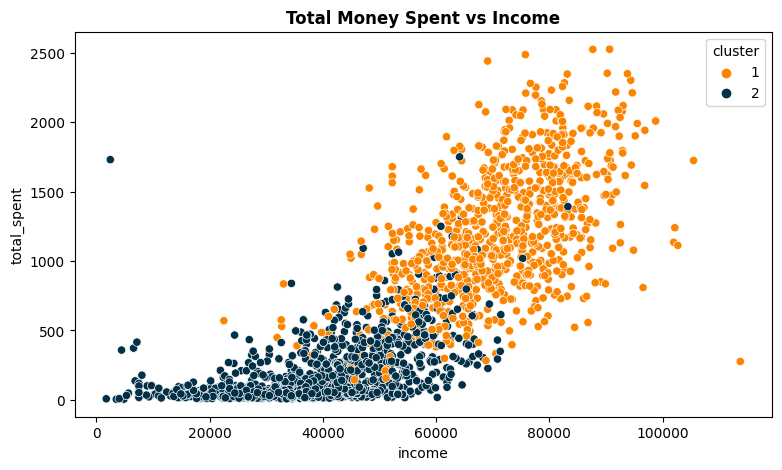

In [86]:
custom_palette = ["#fb8500", "#023047"]
plt.figure(figsize = (9,5))
plt.title('Percentage of items with discount vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_purchases_with_discount', hue = 'cluster', palette = custom_palette)
plt.show()

plt.figure(figsize = (9,5))
plt.title('Percentage of essential items bought vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_essentials', hue = 'cluster', palette = custom_palette)
plt.show()

plt.figure(figsize = (9,5))
plt.title('Number of purchases vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'num_purchases', hue = 'cluster', palette = custom_palette)
plt.show()

plt.figure(figsize = (9,5))
plt.title('Total Money Spent vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'total_spent', hue = 'cluster', palette = custom_palette)
plt.show()